In [1]:
#!pip install bambi git+https://github.com/yannmclatchie/kulprit.git

In [20]:
import pandas as pd
import numpy as np

import bambi as bmb
import kulprit as kpt

import arviz as az
import matplotlib.pyplot as plt

# define model data
data = pd.DataFrame({
    "y": np.random.normal(size=50),
    "x1": np.random.normal(size=50),
    "x2": np.random.normal(size=50)
})
# define and fit model with MCMC
model = bmb.Model("y ~ x1 + x2", data, family="gaussian")
num_draws, num_chains = 1_000, 2
idata = model.fit(draws=num_draws, chains=num_chains)
# build reference model object
proj = kpt.Projector(model, idata)
# project the reference model to some parameter subset and plot posterior
theta_perp = proj.project(model_size=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [y_sigma, x2, x1, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 19 seconds.


tensor(0.9456, grad_fn=<MeanBackward0>)


In [25]:
az.rhat(idata)

<xarray.Dataset>
Dimensions:    ()
Data variables:
    Intercept  float64 1.0
    x1         float64 1.003
    x2         float64 0.9995
    y_sigma    float64 0.9996

In [26]:
az.loo(idata)

Computed from 2000 by 50 log-likelihood matrix

         Estimate       SE
elpd_loo   -71.52     4.63
p_loo        3.93        -

In [27]:
az.loo(theta_perp.inferencedata)

TypeError: log likelihood not found in inference data object

In [24]:
az.rhat(theta_perp.inferencedata)

arviz - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


<xarray.Dataset>
Dimensions:    ()
Data variables:
    Intercept  float64 nan
    x1         float64 nan
    y_sigma    float64 nan

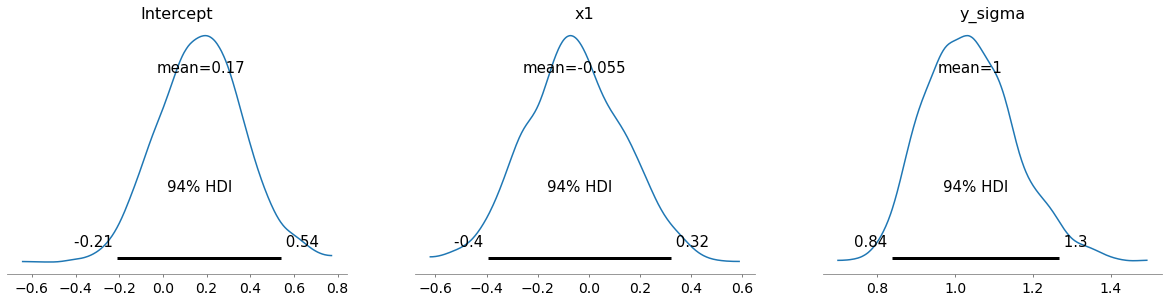

In [21]:
az.plot_posterior(theta_perp.inferencedata)
plt.show()

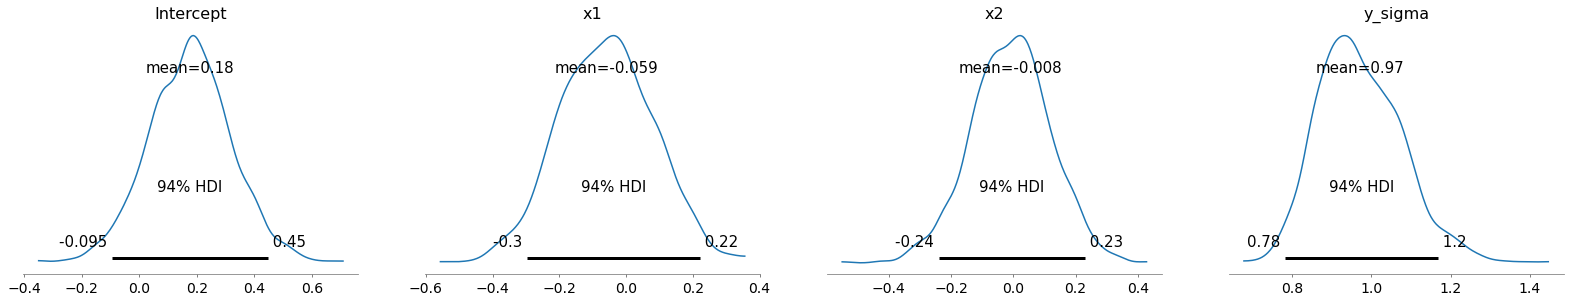

In [22]:
az.plot_posterior(idata, var_names=["Intercept", "x1", "x2", "y_sigma"])
plt.show()